# This code empirically compares subgradient descent and stochastic subgradient descent algorithms
## Randomized Algorithms for Machine Learning and Optimization HW 4
### Jesse Ellin
### 10/6/2020

#### Imports

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.datasets import load_svmlight_file
import urllib
import matplotlib.pyplot as plt

#### Subgradient descent algorithm

In [2]:
def sgdmethod(X, y, subgradloss, subgradreg, regparam, w1, T, a, m):
    """
    X: Input matrix
    y: Result vector
    subgradloss: function to caluculate subgradient loss
    sugradred: function to calculate subgradient regularizer
    regparam: lambda
    w1: first guess at (w,b)
    T: number of iterations
    a: alpha_t = (a+at)^-1
    m: size of minibatch
    """
    t = 0
    X_pos = 0
    X_batch = None
    y_batch = None
    w = [(w1[0],w1[1])]
    while t < T:
        # Shuffle X,y at epoch 
        if t%(len(y)//m) == 0:
            X_pos = 0
            state = np.random.get_state()
            np.random.shuffle(X)
            np.random.set_state(state)
            np.random.shuffle(y)
        X_batch = X[X_pos:X_pos+m]
        y_batch = y[X_pos:X_pos+m]
        X_pos += m
        
        alpha = (1 + a*t)**-1
        
        # Run descent on batch
        g = [0 for x in range(X_batch.shape[1])]
        g_bias = 0
        w_t = w[t]
        for i in range(m):
            bias,loss = subgradloss(X_batch[i], y_batch[i],[w_t[0],w_t[1]])
            g = np.add(g,loss)
            g_bias += bias
        reg = regparam * subgradreg(w_t[0])
        g = np.true_divide(g,m)
        g = np.add(g,reg)
        g_bias /= m
        w.append((np.add(w_t[0],-alpha*g),w_t[1]-g_bias*alpha))
        
        t += 1
    return w


#### Subradient loss algorithm

In [3]:
def subgradient_loss(x, y, w):
    v = [0,0]
    b = w[1]
    w = w[0]
    if 1-y*(np.dot(w,x)+b)>0:
        v[0] = -y
        v[1] = -y*x
    return v

#### Subgradient regularizer algorithm

In [4]:
def subgradient_regularizer(w):
    return w[0]

#### Risk

In [5]:
def risk(X,y,w,lam):
    b = w[1]
    w = w[0]
    hingesum = 0
    for i in range(X.shape[0]):
        hingesum += max(0, 1-y[i]*(np.dot(X[i],w) + b))
    
    regsum = sum(val ** 2 for val in w)
    return (1/X.shape[0])*hingesum + (lam/2)*regsum

#### Load data

In [6]:
url_zip_test = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a"
urllib.request.urlretrieve(url_zip_test, filename="a9a")
f_svm = open("test.svm", "w")
with open("a9a", "r") as file:
    data = file.read()
    f_svm.write(data)
f_svm.close()

url_zip_train = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t"
urllib.request.urlretrieve(url_zip_train, filename="a9a.t")
f_svm = open("train.svm", "w")
with open("a9a.t", "r") as file:
    data = file.read()
    f_svm.write(data)
f_svm.close()

data = load_svmlight_file("test.svm")
X_test,y_test = data[0][:,:122],data[1]

data = load_svmlight_file("train.svm")
X_train,y_train = data[0],data[1]

X_train = X_train.toarray()
X_test = X_test.toarray()

#### Fit data

In [7]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Graph objective function for each weight

In [8]:
def f(X,y,weight,lam):
    summand = 0
    for i in range(X.shape[0]):
        summand += max(1 - y[i] * (np.dot(weight[0],X[i]) + weight[1]),0)
    summand /= X.shape[0]
    return summand + lam/2 * sum(val ** 2 for val in weight[0]) 

For a=1000
Training risk = 2.3398459018077227
Testing risk = 2.391743096456179


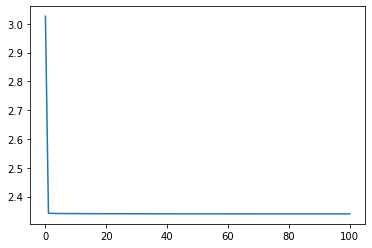

For a=100
Training risk = 2.319158598023409
Testing risk = 2.3709631181388366


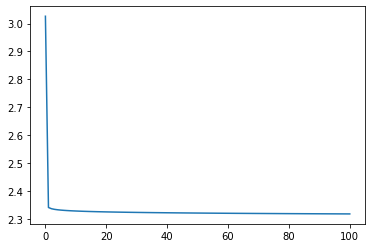

For a=10
Training risk = 2.1371774465304343
Testing risk = 2.188837313623533


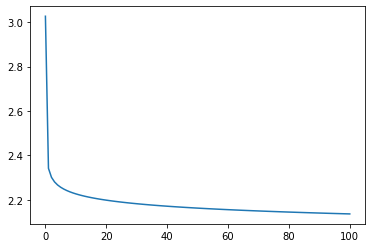

For a=1
Training risk = 1.3374074084269933
Testing risk = 1.4037031909113402


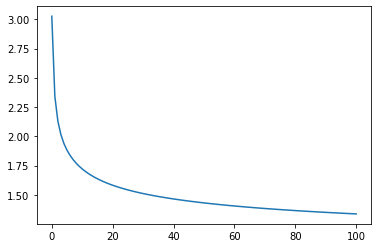

For a=0.1
Training risk = 0.5488502255598301
Testing risk = 0.585558954453857


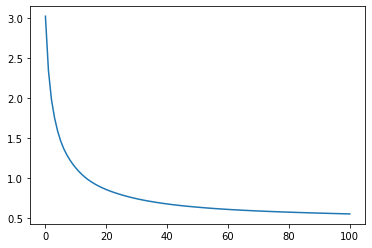

For a=0.01
Training risk = 0.41173669715767053
Testing risk = 0.4333265865246933


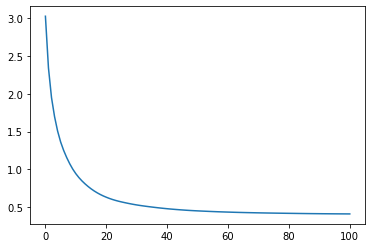

For a=0.001
Training risk = 0.403532753539895
Testing risk = 0.4218568321420911


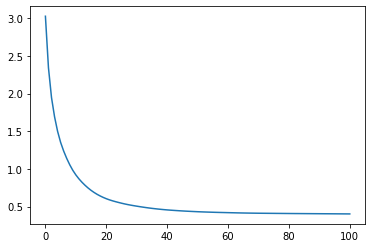

For a=0.0001
Training risk = 0.4026190792059643
Testing risk = 0.42062342900421856


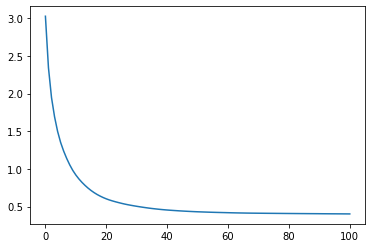

For a=1e-05
Training risk = 0.40261083388604807
Testing risk = 0.4204695200829637


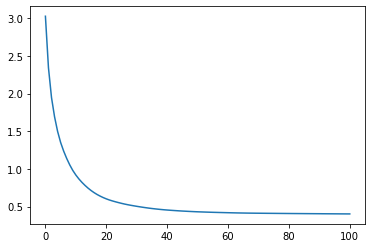

In [43]:
a_list = [10 ** i for i in range(3,-6,-1)]
for a in a_list:
    print(f"For a={a}")
    weights = sgdmethod(X=X_train,y=y_train,subgradloss=subgradient_loss,subgradreg=subgradient_regularizer,regparam=1/X_train.shape[0],w1 = [np.array([1 for x in range(X_train.shape[1])]),1],T=100,a=a,m=X_train.shape[0])
    y_vals = [f(X_train,y_train,weights[i],1/X_train.shape[0]) for i in range(101)]
    print(f"Training risk = {risk(X_train,y_train,weights[-1],1/X_train.shape[0])}")
    print(f"Testing risk = {risk(X_test,y_test,weights[-1],1/X_test.shape[0])}")
    plt.plot([t for t in range(101)],y_vals)
    plt.show()

For a=1000
Training risk = 7.023391789690925
Testing risk = 7.023391789690925


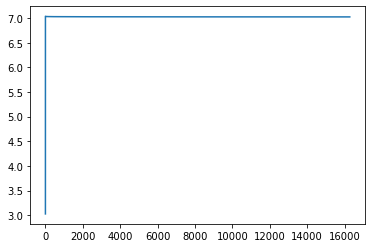

For a=100
Training risk = 5.623061842281447
Testing risk = 5.623061842281447


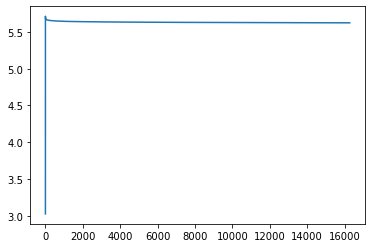

For a=10
Training risk = 2.4130256470346345
Testing risk = 2.4130256470346345


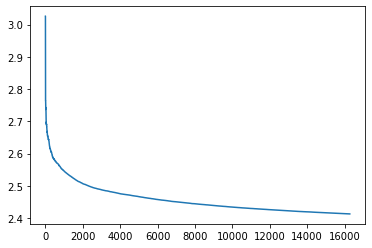

For a=1
Training risk = 1.6172506487587042
Testing risk = 1.6172506487587042


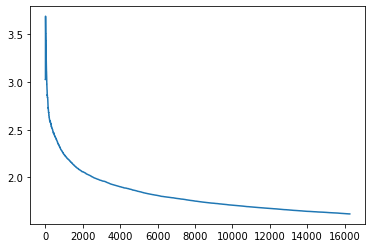

For a=0.1
Training risk = 1.1405525957823286
Testing risk = 1.1405525957823286


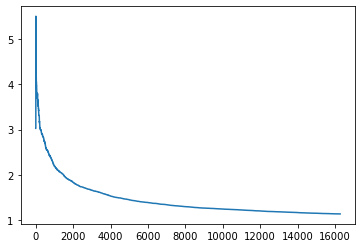

For a=0.01
Training risk = 0.9198146248964603
Testing risk = 0.9198146248964603


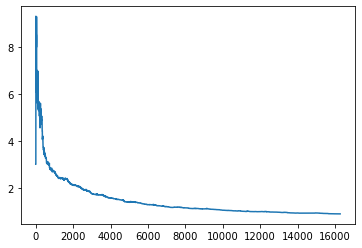

For a=0.001
Training risk = 1.688792141969701
Testing risk = 1.688792141969701


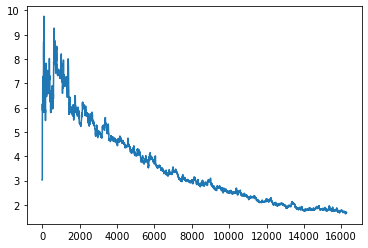

For a=0.0001
Training risk = 5.76183596858277
Testing risk = 5.76183596858277


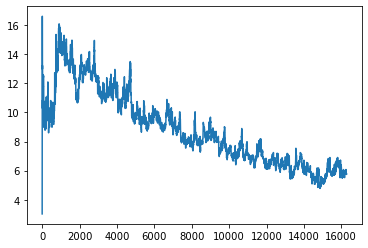

For a=1e-05
Training risk = 13.71886951009405
Testing risk = 13.71886951009405


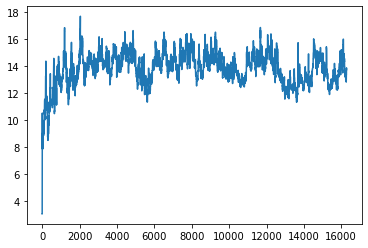

In [44]:
a_list = [10 ** i for i in range(3, -6, -1)]
for a in a_list:
    print(f"For a={a}")
    weights = sgdmethod(X=X_train,y=y_train,subgradloss=subgradient_loss,subgradreg=subgradient_regularizer,regparam=1/X_train.shape[0],w1=[np.array([1 for x in range(X_train.shape[1])]),1],T=X_train.shape[0],a=a,m=1)
    y_vals = [f(X_train,y_train,weights[i],1/X_train.shape[0]) for i in range(len(weights))]
    print(f"Training risk = {risk(X_train,y_train,weights[-1],1/X_train.shape[0])}")
    print(f"Testing risk = {risk(X_train,y_train,weights[-1],1/X_train.shape[0])}")
    plt.plot([t for t in range(len(y_vals))],y_vals)
    plt.show()

#### Accuracy

In [9]:
def accuracy(X,y,weight):
    total = 0
    for i in range(X.shape[0]):
        if (y[i]==0 and np.dot(weight,X[i])==0) or (y[i]*np.dot(weight,X[i]) > 0):
            total += 1
    return total/X.shape[0]

In [50]:
weights = sgdmethod(X=X_train, y=y_train, subgradloss=subgradient_loss, subgradreg=subgradient_regularizer, regparam=1/X_train.shape[0], w1=[np.array([1 for x in range(X_train.shape[1])]),1], T=100, a=0.01, m=X_train.shape[0])

In [63]:
strain_vals = [accuracy(X_train, y_train, w[0]) for w in weights]
optimal = max(strain_vals)
print(f"For standard training data weights")
print(f"Max accuracy: {optimal}")
# plt.show()

For standard training data weights
Max accuracy: 0.7438118051716724


In [64]:
stest_vals = [accuracy(X_test,y_test,w[0]) for w in weights]
optimal = max(stest_vals)
print(f"For standard testing data weights")
print(f"Max accuracy: {optimal}")
# plt.show()

For standard testing data weights
Max accuracy: 0.7448481311999017


In [23]:
def averageModel(weights,t):
    if t < 2:
        return weights[t]
    summand = np.array([0]*len(weights[0]))
    for i in range(t//2,t):
        summand = np.add(summand,np.array(weights[i]))
    return (1/(t-(t/2)+1)) * summand

In [24]:
averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
atrain_vals = [accuracy(X_train,y_train,w[0]) for w in averages]
optimal = max(atrain_vals)
print(f"For averaged training data weights")
print(f"Max accuracy: {optimal}")
# plt.show()

For averaged training data weights
Max accuracy: 0.6575763159511087


In [25]:
averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
atest_vals = [accuracy(X_test,y_test,w[0]) for w in averages]
optimal = max(atest_vals)
print(f"For averaged testing data weights")
print(f"Max accuracy: {optimal}")

For averaged testing data weights
Max accuracy: 0.6519762906544639


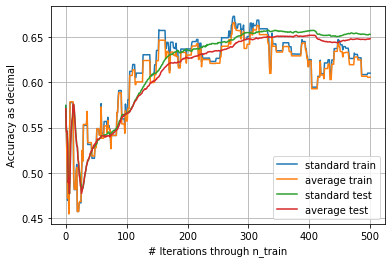

In [26]:
x_data = [i for i in range(len(weights))]
strain = plt.plot(x_data, strain_vals, label='standard train')
stest = plt.plot(x_data, stest_vals, label='average train')
atrain = plt.plot(x_data, atrain_vals, label='standard test')
atest = plt.plot(x_data, atest_vals, label='average test')
plt.xlabel('# Iterations through n_train')
plt.ylabel('Accuracy as decimal')
plt.grid()
plt.legend()
plt.show()

#### Exploring accuracy of multiple a values

In [27]:
def graph_accuracy(X_train,y_train,X_test,y_test,a):
    print(f"Plotting for a={a}")
    weights = weights = sgdmethod(X=X_train, y=y_train, subgradloss=subgradient_loss, subgradreg=subgradient_regularizer, regparam=1/X_train.shape[0], w1=[np.array([1 for x in range(X_train.shape[1])]),1], T=100, a=a, m=X_train.shape[0])
    
    strain_vals = [accuracy(X_train, y_train, w[0]) for w in weights]
    optimal = max(strain_vals)
    print(f"For standard training data weights")
    print(f"Max accuracy: {optimal}")
    
    stest_vals = [accuracy(X_test,y_test,w[0]) for w in weights]
    optimal = max(stest_vals)
    print(f"For standard testing data weights")
    print(f"Max accuracy: {optimal}")
    
    averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
    atrain_vals = [accuracy(X_train,y_train,w[0]) for w in averages]
    optimal = max(atrain_vals)
    print(f"For averaged training data weights")
    print(f"Max accuracy: {optimal}")
    
    averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
    atest_vals = [accuracy(X_test,y_test,w[0]) for w in averages]
    optimal = max(atest_vals)
    print(f"For averaged testing data weights")
    print(f"Max accuracy: {optimal}")
    
    x_data = [i for i in range(len(weights))]
    strain = plt.plot(x_data, strain_vals, label='standard train')
    stest = plt.plot(x_data, stest_vals, label='average train')
    atrain = plt.plot(x_data, atrain_vals, label='standard test')
    atest = plt.plot(x_data, atest_vals, label='average test')
    plt.xlabel('# Iterations through n_train')
    plt.ylabel('Accuracy as decimal')
    plt.title(f"a={a}")
    plt.grid()
    plt.legend()
    plt.show()

Plotting for a=1000
For standard training data weights
Max accuracy: 0.6371844481297217
For standard testing data weights
Max accuracy: 0.6385553269248487
For averaged training data weights
Max accuracy: 0.6371230268411031
For averaged testing data weights
Max accuracy: 0.6385553269248487


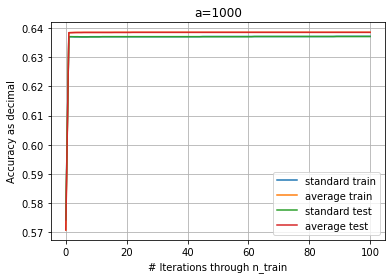

Plotting for a=100
For standard training data weights
Max accuracy: 0.6390270867882808
For standard testing data weights
Max accuracy: 0.6400909062989466
For averaged training data weights
Max accuracy: 0.6390270867882808
For averaged testing data weights
Max accuracy: 0.6400294831239827


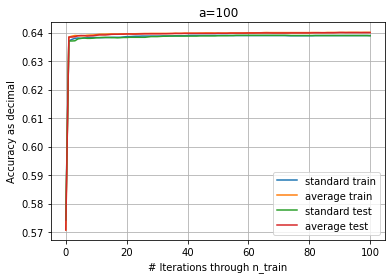

Plotting for a=10
For standard training data weights
Max accuracy: 0.6591118481665745
For standard testing data weights
Max accuracy: 0.6603605540370382
For averaged training data weights
Max accuracy: 0.6573920520852528
For averaged testing data weights
Max accuracy: 0.659039955775314


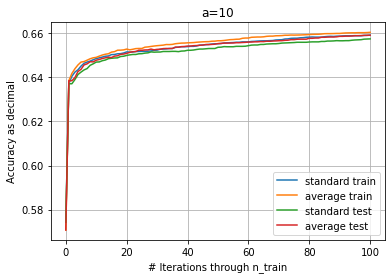

Plotting for a=1
For standard training data weights
Max accuracy: 0.7426448006879184
For standard testing data weights
Max accuracy: 0.7430361475384663
For averaged training data weights
Max accuracy: 0.7403722130090289
For averaged testing data weights
Max accuracy: 0.7408249132397654


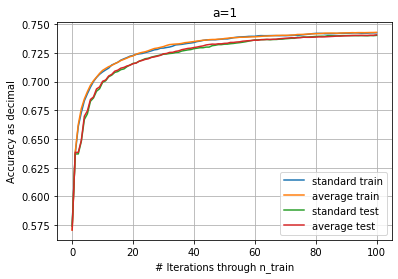

Plotting for a=0.1
For standard training data weights
Max accuracy: 0.7435661200171979
For standard testing data weights
Max accuracy: 0.7447559964374558
For averaged training data weights
Max accuracy: 0.7441803329033844
For averaged testing data weights
Max accuracy: 0.7441417646878167


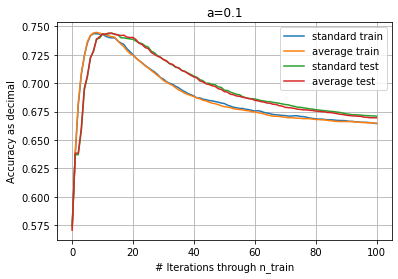

Plotting for a=0.01
For standard training data weights
Max accuracy: 0.7438118051716724
For standard testing data weights
Max accuracy: 0.7448481311999017
For averaged training data weights
Max accuracy: 0.7425833793992997
For averaged testing data weights
Max accuracy: 0.7435582445256596


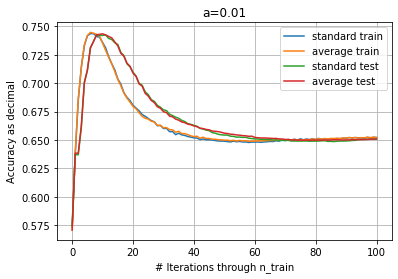

Plotting for a=0.001
For standard training data weights
Max accuracy: 0.7438118051716724
For standard testing data weights
Max accuracy: 0.7449095543748656
For averaged training data weights
Max accuracy: 0.7426448006879184
For averaged testing data weights
Max accuracy: 0.7433739750007677


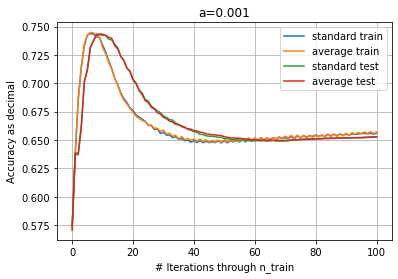

Plotting for a=0.0001
For standard training data weights
Max accuracy: 0.7438118051716724
For standard testing data weights
Max accuracy: 0.7448481311999017
For averaged training data weights
Max accuracy: 0.742706221976537
For averaged testing data weights
Max accuracy: 0.7435275329381775


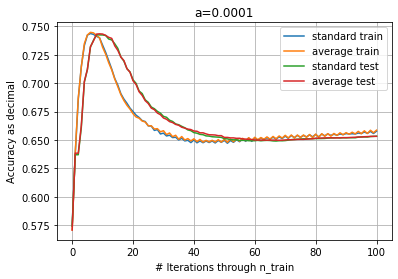

Plotting for a=1e-05
For standard training data weights
Max accuracy: 0.7437503838830538
For standard testing data weights
Max accuracy: 0.7448174196124198
For averaged training data weights
Max accuracy: 0.7427676432651557
For averaged testing data weights
Max accuracy: 0.7435582445256596


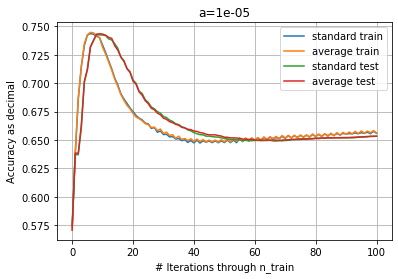

In [28]:
for a in a_list:
    graph_accuracy(X_train,y_train,X_test,y_test,a)

#### Accuracy on sgd

For standard training data weights
Max accuracy: 0.6768011792887415
For standard testing data weights
Max accuracy: 0.670464666318602
For averaged training data weights
Max accuracy: 0.6557336772925496
For averaged testing data weights
Max accuracy: 0.6539111206658272


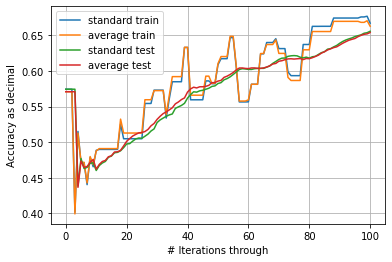

In [33]:
weights = sgdmethod(X=X_train, y=y_train, subgradloss=subgradient_loss, subgradreg=subgradient_regularizer, regparam=1/X_train.shape[0], w1=[np.array([1 for x in range(X_train.shape[1])]),1], T=100, a=0.001, m=1)

strain_vals = [accuracy(X_train, y_train, w[0]) for w in weights]
optimal = max(strain_vals)
print(f"For standard training data weights")
print(f"Max accuracy: {optimal}")

stest_vals = [accuracy(X_test,y_test,w[0]) for w in weights]
optimal = max(stest_vals)
print(f"For standard testing data weights")
print(f"Max accuracy: {optimal}")

averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
atrain_vals = [accuracy(X_train,y_train,w[0]) for w in averages]
optimal = max(atrain_vals)
print(f"For averaged training data weights")
print(f"Max accuracy: {optimal}")

averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
atest_vals = [accuracy(X_test,y_test,w[0]) for w in averages]
optimal = max(atest_vals)
print(f"For averaged testing data weights")
print(f"Max accuracy: {optimal}")

x_data = [i for i in range(len(weights))]
strain = plt.plot(x_data, strain_vals, label='standard train')
stest = plt.plot(x_data, stest_vals, label='average train')
atrain = plt.plot(x_data, atrain_vals, label='standard test')
atest = plt.plot(x_data, atest_vals, label='average test')
plt.xlabel('# Iterations through')
plt.ylabel('Accuracy as decimal')
plt.grid()
plt.legend()
plt.show()

In [34]:
def graph_accuracy_sgd(X_train,y_train,X_test,y_test,a):
    print(f"Plotting for a={a}")
    weights = weights = sgdmethod(X=X_train, y=y_train, subgradloss=subgradient_loss, subgradreg=subgradient_regularizer, regparam=1/X_train.shape[0], w1=[np.array([1 for x in range(X_train.shape[1])]),1], T=100, a=a, m=1)
    
    strain_vals = [accuracy(X_train, y_train, w[0]) for w in weights]
    optimal = max(strain_vals)
    print(f"For standard training data weights")
    print(f"Max accuracy: {optimal}")
    
    stest_vals = [accuracy(X_test,y_test,w[0]) for w in weights]
    optimal = max(stest_vals)
    print(f"For standard testing data weights")
    print(f"Max accuracy: {optimal}")
    
    averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
    atrain_vals = [accuracy(X_train,y_train,w[0]) for w in averages]
    optimal = max(atrain_vals)
    print(f"For averaged training data weights")
    print(f"Max accuracy: {optimal}")
    
    averages = [averageModel(weights[0:t+1],t) for t in range(len(weights))]
    atest_vals = [accuracy(X_test,y_test,w[0]) for w in averages]
    optimal = max(atest_vals)
    print(f"For averaged testing data weights")
    print(f"Max accuracy: {optimal}")
    
    x_data = [i for i in range(len(weights))]
    strain = plt.plot(x_data, strain_vals, label='standard train')
    stest = plt.plot(x_data, stest_vals, label='average train')
    atrain = plt.plot(x_data, atrain_vals, label='standard test')
    atest = plt.plot(x_data, atest_vals, label='average test')
    plt.xlabel('# Iterations')
    plt.ylabel('Accuracy as decimal')
    plt.title(f"a={a}")
    plt.grid()
    plt.legend()
    plt.show()

Plotting for a=1000
For standard training data weights
Max accuracy: 0.5744118911614766
For standard testing data weights
Max accuracy: 0.5712662387518811
For averaged training data weights
Max accuracy: 0.5744118911614766
For averaged testing data weights
Max accuracy: 0.5712048155769172


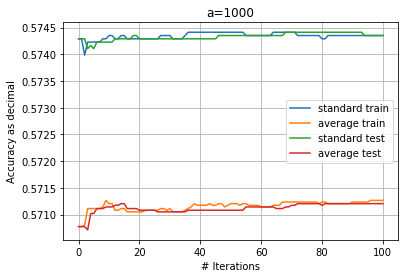

Plotting for a=100
For standard training data weights
Max accuracy: 0.5787113813647811
For standard testing data weights
Max accuracy: 0.577040017198489
For averaged training data weights
Max accuracy: 0.5783428536330693
For averaged testing data weights
Max accuracy: 0.5769171708485612


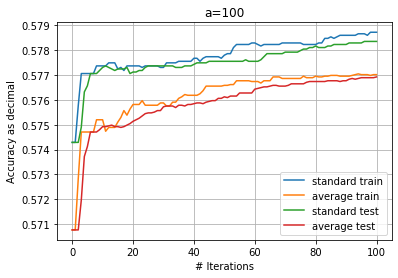

Plotting for a=10
For standard training data weights
Max accuracy: 0.5742890485842393
For standard testing data weights
Max accuracy: 0.5707748533521698
For averaged training data weights
Max accuracy: 0.5742890485842393
For averaged testing data weights
Max accuracy: 0.5707748533521698


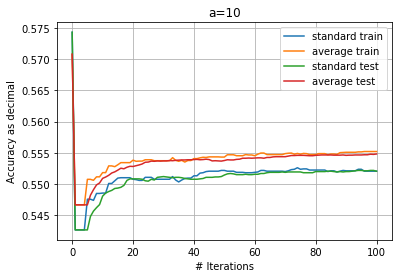

Plotting for a=1
For standard training data weights
Max accuracy: 0.6571463669307782
For standard testing data weights
Max accuracy: 0.6514234820797887
For averaged training data weights
Max accuracy: 0.654996621829126
For averaged testing data weights
Max accuracy: 0.6498264795307269


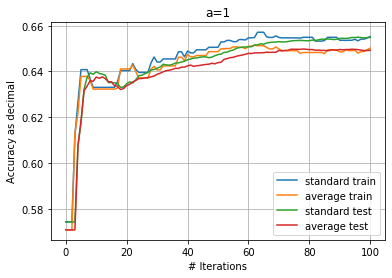

Plotting for a=0.1
For standard training data weights
Max accuracy: 0.6633499170812603
For standard testing data weights
Max accuracy: 0.6558152390897085
For averaged training data weights
Max accuracy: 0.6565935753332105
For averaged testing data weights
Max accuracy: 0.6513927704923067


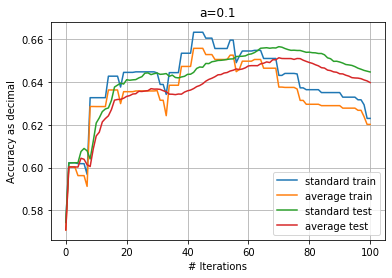

Plotting for a=0.01
For standard training data weights
Max accuracy: 0.6702905226951661
For standard testing data weights
Max accuracy: 0.6678234697951537
For averaged training data weights
Max accuracy: 0.6621214913088876
For averaged testing data weights
Max accuracy: 0.658395012438193


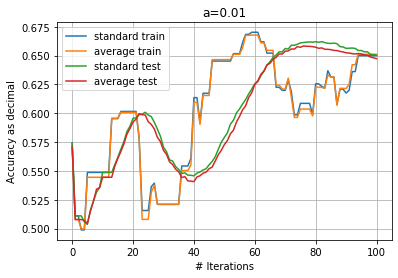

Plotting for a=0.001
For standard training data weights
Max accuracy: 0.6683250414593698
For standard testing data weights
Max accuracy: 0.6643223488222106
For averaged training data weights
Max accuracy: 0.6775996560407838
For averaged testing data weights
Max accuracy: 0.6751328276158595


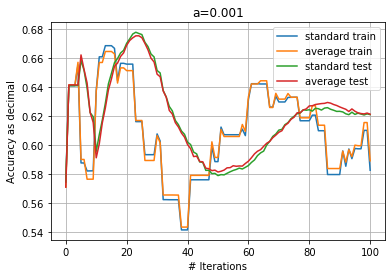

Plotting for a=0.0001
For standard training data weights
Max accuracy: 0.6519255573981942
For standard testing data weights
Max accuracy: 0.6524369644666933
For averaged training data weights
Max accuracy: 0.6385971377679504
For averaged testing data weights
Max accuracy: 0.639138847087006


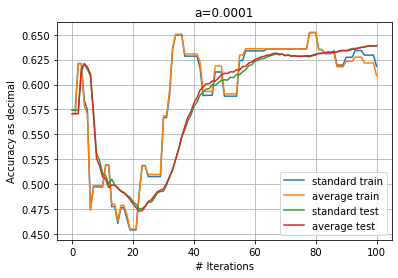

Plotting for a=1e-05
For standard training data weights
Max accuracy: 0.6461519562680424
For standard testing data weights
Max accuracy: 0.6443291053714566
For averaged training data weights
Max accuracy: 0.6382900313248572
For averaged testing data weights
Max accuracy: 0.6354534565891711


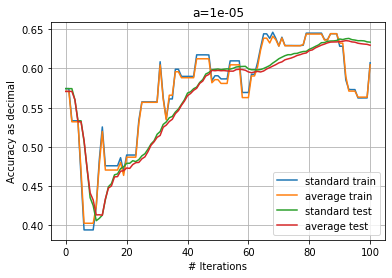

In [35]:
a_list = [10**i for i in range(3,-6,-1)]
for a in a_list:
    graph_accuracy_sgd(X_train,y_train,X_test,y_test,a)